In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [5]:
test

,id,path
0,TEST_0000,./test/TEST_0000.wav
1,TEST_0001,./test/TEST_0001.wav
2,TEST_0002,./test/TEST_0002.wav
3,TEST_0003,./test/TEST_0003.wav
4,TEST_0004,./test/TEST_0004.wav
...,...,...
1876,TEST_1876,./test/TEST_1876.wav
1877,TEST_1877,./test/TEST_1877.wav
1878,TEST_1878,./test/TEST_1878.wav
1879,TEST_1879,./test/TEST_1879.wav


In [6]:
from glob import glob
import numpy as np
import librosa
import gc

# MFCC 파라미터
n_mfcc = 13

for i, file_path in enumerate(test['path']):
    audio, sr = librosa.load(file_path)

    # MFCC 추출
    mfcc = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=13)

    plt.figure(dpi=600)
    plt.imshow(mfcc)
    plt.axis('off')
    plt.savefig('C:/workplace/dacon/voice/test_image/' + file_path.split('/')[-1].replace('.wav', '.png'), bbox_inches = 'tight', pad_inches=0)
    plt.close()
    if i == 500:
        gc.collect()




In [17]:
mfcc = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=13)
plt.imshow(mfcc)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "c:\Users\kweon\anaconda3\envs\gibo\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "c:\Users\kweon\anaconda3\envs\gibo\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

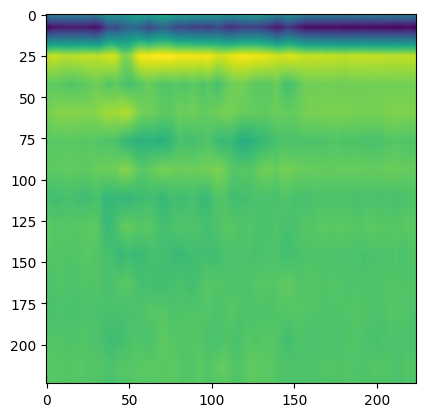

In [14]:
from skimage.transform import resize

resized_image = resize(mfcc_image, (224, 224))
plt.imshow(resized_image)

In [6]:
import cv2
import numpy as np

# 이미지 파일 경로
image_path = "C:/workplace/dacon/voice/train_image/TRAIN_1860.png"

# 이미지를 NumPy 배열로 불러오기
image_cv = cv2.imread(image_path)
image_np = np.array(image_cv)


In [9]:
image_cv

array([[[102,  20,  71],
        [102,  20,  71],
        [102,  20,  71],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]],

       [[102,  20,  71],
        [102,  20,  71],
        [102,  20,  71],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]],

       [[102,  20,  71],
        [102,  20,  71],
        [102,  20,  71],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]],

       ...,

       [[101, 198,  87],
        [101, 198,  87],
        [101, 198,  87],
        ...,
        [ 98, 200,  91],
        [ 98, 200,  91],
        [ 98, 200,  91]],

       [[101, 198,  87],
        [101, 198,  87],
        [101, 198,  87],
        ...,
        [ 98, 200,  91],
        [ 98, 200,  91],
        [ 98, 200,  91]],

       [[101, 198,  87],
        [101, 198,  87],
        [101, 198,  87],
        ...,
        [ 98, 200,  91],
        [ 98, 200,  91],
        [ 98, 200,  91]]

In [3]:
from tqdm import tqdm
import librosa
def FE(path, type=0):
    lst = []
    
    def fe(x, name, type=0):
        mean = np.mean(x, axis=1)
        max = np.max(x, axis=1)
        min = np.min(x, axis=1)
        median = np.median(x, axis=1)
        std = np.std(x, axis=1)
        df = pd.DataFrame()
        
        if type == 0:
            df[f'{name}_mean'] = [mean[0]]
            df[f'{name}_max'] =[max[0]]
            df[f'{name}_min'] = [min[0]]
            df[f'{name}_median'] = [median[0]]
            df[f'{name}_std'] = [std[0]]
 
            
        elif type == 1:
            for i in range(mean.shape[0]):
                df[f'{name}_mean_{i}'] = [mean[i]]
                
            for i in range(max.shape[0]):
                df[f'{name}_max_{i}'] = [max[i]]
                
            for i in range(min.shape[0]):
                df[f'{name}_min_{i}'] = [min[i]]
                
            for i in range(median.shape[0]):
                df[f'{name}_median_{i}'] = [median[i]]
                
            for i in range(std.shape[0]):
                df[f'{name}_std_{i}'] = [std[i]]
                
        return df
    
    for file in tqdm(range(len(path))):
        audio, sr = librosa.load(path.iloc[file]['path'])
        
        # MFCC 계산
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        # Zero Crossing Rate (ZCR) 계산
        zcr = librosa.feature.zero_crossing_rate(y=audio)

        # Spectral Centroid 계산
        centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)

        # Spectral Roll-off 계산
        rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)

        # Spectral Contrast 계산
        contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        spectral_bw = librosa.feature.spectral_bandwidth(y=audio, sr=sr)

        db = librosa.power_to_db(mfccs)

        rms = librosa.feature.rms(y=audio)

        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        
        mfcc_diff = np.diff(mfccs, axis=1)
        
        db_diff = np.diff(db, axis=1)
        # df = pd.concat(
        #     [
        #     fe(mfccs, 'mfccs', type=1), fe(zcr, 'zcr'), fe(centroid, 'centroid'), fe(rolloff, 'rolloff'), fe(contrast, 'contrast'),
        #     fe(spectral_bw, 'spectral_bw'), fe(db, 'db', type=1), fe(rms, 'rms'), fe(chroma, 'chroma'), fe(mfcc_diff, 'mfcc_diff', type=1),
        #     fe(db_diff, 'db_diff', type=1)
        #     ], 
        #     axis=1)
        
        df = pd.concat(
            [
            fe(zcr, 'zcr'), fe(centroid, 'centroid'), fe(rolloff, 'rolloff'), fe(contrast, 'contrast'),
            fe(spectral_bw, 'spectral_bw'), fe(rms, 'rms'), fe(chroma, 'chroma'), fe(mfcc_diff, 'mfcc_diff', type=1),
            fe(db_diff, 'db_diff', type=1)
            ], 
            axis=1)
        if type == 0:
            df['label'] = path.iloc[file]['label']
        elif type == 1:
            pass
        
        lst.append(df)
        
    df = pd.concat(lst)
    
    return df
    
        
        

In [4]:
from glob import glob
import warnings
warnings.filterwarnings(action='ignore')

path = glob('C:/workplace/dacon/voice/train/*')
train_df = FE(path=train)
train_df =train_df.reset_index()
train_df = train_df.drop('index', axis=1)

100%|██████████| 5001/5001 [04:46<00:00, 17.47it/s]


In [5]:
path = glob('C:/workplace/dacon/voice/test/*')
test_df = FE(path=test, type=1)

100%|██████████| 1881/1881 [01:43<00:00, 18.23it/s]


In [43]:
train_df.iloc[:, 65:80]

,zcr_mean,zcr_max,zcr_min,zcr_median,zcr_std,centroid_mean,centroid_max,centroid_min,centroid_median,centroid_std,rolloff_mean,rolloff_max,rolloff_min,rolloff_median,rolloff_std
0,0.042319,0.146973,0.012207,0.038574,0.020448,1197.977146,3457.166703,950.841205,1117.714756,376.521613,2717.469328,6955.224609,1658.056641,2637.817383,903.997902
1,0.104138,0.471680,0.017578,0.041504,0.118437,1818.842763,4670.907431,895.587946,1193.008985,1162.076253,3912.754511,7084.423828,1431.958008,3090.014648,1832.468569
2,0.097335,0.478027,0.018555,0.048584,0.117857,1645.628696,4704.121683,822.327314,1249.574805,1068.900233,3387.207031,7073.657227,947.460938,3100.781250,1663.566772
3,0.043188,0.132812,0.011230,0.038574,0.025720,1079.355424,3278.691721,664.576431,968.570220,393.334608,2007.648193,5953.930664,710.595703,1771.105957,1057.628272
4,0.045609,0.100586,0.015625,0.040039,0.016616,1161.830708,2808.836596,667.735366,1144.440991,354.348579,2601.264106,5534.033203,667.529297,2723.950195,1039.827334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.042933,0.300293,0.011719,0.032715,0.042482,1188.427507,4409.259637,645.276036,980.836456,631.639792,2437.716154,6707.592773,602.929688,1916.455078,1572.780898
4997,0.082426,0.192871,0.025879,0.086182,0.043804,1667.145975,2966.227499,926.897648,1594.524207,536.066875,3515.980558,6180.029297,1798.022461,3364.562988,1016.365868
4998,0.067737,0.378418,0.018555,0.035156,0.084794,1393.322561,4410.895528,739.578119,1060.892648,910.998709,2777.896536,6869.091797,947.460938,2411.718750,1563.190415
4999,0.048504,0.197754,0.013672,0.041016,0.027635,1292.574560,3522.066489,894.083120,1215.117434,379.075419,3120.821275,6578.393555,1044.360352,3197.680664,1048.805055


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop('label', axis=1), train_df['label'], 
                                                      train_size=0.8, shuffle=True, stratify=train_df['label'], random_state=23)

In [7]:
from catboost import CatBoostClassifier, Pool
# model = CatBoostClassifier(random_seed = 113,
#                           task_type='GPU',                      
#                           bootstrap_type = 'Poisson',
#                           loss_function='MultiClass',
#                         #   eval_metric = 'Accuracy',
#                           iterations =  10000,                         
#                           verbose=1000
#                           )
model = CatBoostClassifier(random_seed = 23,
                          task_type='GPU',                      
                          iterations =  10000,                         
                          verbose=1000
                          )
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)

fit_model = model.fit(train_pool, 
                          eval_set=valid_pool,
                          use_best_model=True
                          )

Learning rate set to 0.044222
0:	learn: 1.7581709	test: 1.7631557	best: 1.7631557 (0)	total: 8.01ms	remaining: 1m 20s
1000:	learn: 0.3701903	test: 1.2532333	best: 1.2529459 (995)	total: 7.39s	remaining: 1m 6s
2000:	learn: 0.1511926	test: 1.2742388	best: 1.2529459 (995)	total: 14.7s	remaining: 58.6s
3000:	learn: 0.0757568	test: 1.3078560	best: 1.2529459 (995)	total: 21.9s	remaining: 51.2s


KeyboardInterrupt: 

In [56]:
model = CatBoostClassifier(random_seed = 23,
                          task_type='GPU',                      
                          iterations =  10000, 
                          eval_metric = 'TotalF1',                        
                          verbose=1000
                          )
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)

fit_model = model.fit(train_pool, 
                          eval_set=valid_pool,
                          use_best_model=True
                          )

Learning rate set to 0.044222
0:	learn: 0.4068058	test: 0.3674905	best: 0.3674905 (0)	total: 13.2ms	remaining: 2m 11s
1000:	learn: 0.9945038	test: 0.5199121	best: 0.5205211 (962)	total: 10.9s	remaining: 1m 37s
2000:	learn: 1.0000000	test: 0.5258049	best: 0.5292009 (1900)	total: 21.6s	remaining: 1m 26s
3000:	learn: 1.0000000	test: 0.5287519	best: 0.5375833 (2681)	total: 32.3s	remaining: 1m 15s
4000:	learn: 1.0000000	test: 0.5302740	best: 0.5375833 (2681)	total: 43.1s	remaining: 1m 4s
5000:	learn: 1.0000000	test: 0.5318943	best: 0.5375833 (2681)	total: 53.8s	remaining: 53.8s


KeyboardInterrupt: 

In [77]:
np.mean(spectral_bw, axis=1)
np.max(spectral_bw, axis=1)
np.min(spectral_bw, axis=1)
np.std(spectral_bw, axis=1)
np.median(spectral_bw, axis=1)
np.diff(db, axis=1).shape

lst = []
lst2= []
lst3= []
lst4= []
lst.append(np.mean(mfccs, axis=1))
lst2.append(np.mean(mfccs, axis=1))
lst3.append(np.mean(mfccs, axis=1))

lst4 = [lst, lst2, lst3]
pd.DataFrame(lst4)

for i, j in enumerate(lst4):
    print(i)

0
1
2


In [54]:
tempo, a = librosa.beat.beat_track(y=audio, sr=sr)
tempo

129.19921875

In [37]:
dum_mfcc.shape
np.mean(dum_mfcc, axis=1)
np.max(dum_mfcc, axis=1)

array([-362.26068   ,  174.29703   ,   32.365677  ,  121.41803   ,
          0.82273257,   78.00381   ,   -3.657601  ,   55.975086  ,
         -1.3621055 ,   23.457863  ,    9.010335  ,    0.7740803 ,
         19.32623   ], dtype=float32)

In [45]:
from glob import glob

dum = glob(r'train/*')
len(dum)

5001

In [13]:
def trans_mfcc(path):
    

(13, 113)

(13, 103)